# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:center;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"> <b>HEART FAILURE PREDICTION</b></div>
<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

<div style="color:white;display:fill;border-radius:8px;font-size:120%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:center;"><b><span style='color:black;text-align:center'>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
​
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
​
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. 
​ </span></b></p></div> 

<a id="#header"></a>
# <div id = "header" style="padding: 30px;color:white;margin:10;font-size:60%;text-align:center;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"> <b>TABLE OF CONTENTS</b></div>

<li style = "color:lightgray"><a href = "#title-one" style = "color:#F1A424;border:1;border-radius:3px;font-size:19px">1️⃣ IMPORTING LIBRARIES </a></li>
<li style = "color:lightgray"><a href = "#title-two" style = "color:#F1A424;border:0;border-radius:3px;font-size:19px">2️⃣ LOADING DATA </a></li>
<li style = "color:lightgray"><a href = "#title-three" style = "color:#F1A424;border:0;border-radius:3px;font-size:19px">3️⃣ DATA ANALYSIS </a></li>
<li style = "color:lightgray"><a href = "#title-four" style = "color:#F1A424;border:0;border-radius:3px;font-size:19px">4️⃣ DATA PREPROCESSING </a></li>
<li style = "color:lightgray"><a href = "#title-MB" style = "color:#F1A424;border:0;border-radius:3px;font-size:19px">MODEL BUILDING </a></li>
<li style = "color:lightgray"><a href = "#title-five" style = "color:#F1A424;border:0;border-radius:3px;font-size:19px">5️⃣ SVM </a></li>
<li style = "color:lightgray"><a href = "#title-six" style = "color:#F1A424;border:0;border-radius:3px;font-size:19px">6️⃣ ANN </a></li>
<li style = "color:lightgray"><a href = "#title-seven" style = "color:#F1A424;border:0;border-radius:3px;font-size:19px"> END </a></li>


<a id="title-one"></a>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>1 |</span></b> <b>IMPORTING LIBRARIES</b></div>

<a href="#header" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


# <div  style="padding: 20px;color:white;margin:5;font-size:60%;text-align:left;border-radius:50px;background-color:#FFFFFF;overflow:hidden;background-color:gray"> <a href = "#header" style = "color:white">TABLE OF CONTENTS</a></div>

In [5]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas_profiling as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score



<a id="title-two"></a>
# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b>LOADING DATA</b></div>

In [6]:
#loading data
data_url = os.path.abspath(os.getcwd())

data_df = pd.read_csv(data_url+"\\heart_failure_clinical_records_dataset.csv")
data_df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

<div style="border-radius:10px;
            border : black solid;
            background-color: 	#FFFFF0;
            font-size:110%;
            text-align: left">

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center>About the data (Description of attributes)</center></h2>  
    
* **age:** Age of the patient 
* **anaemia:** Haemoglobin level of patient (Boolean) 
* **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
* **diabetes:** If the patient has diabetes (Boolean)
* **ejection_fraction:** Percentage of blood leaving the heart at each contraction
* **high_blood_pressure:** If the patient has hypertension (Boolean) 
* **platelets:** Platelet count of blood (kiloplatelets/mL)
* **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
* **serum_sodium:** Level of serum sodium in the blood (mEq/L)
* **sex:** Sex of the patient
* **smoking:** If the patient smokes or not (Boolean) 
* **time:** Follow-up period (days) 
* **DEATH_EVENT:** If the patient deceased during the follow-up period (Boolean)

**[Attributes having Boolean values:** 0 = Negative (No); 1 = Positive (Yes)]

<a id="title-three"></a>
# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b>DATA ANALYSIS</b></div>
<img style="width: 200px; height: auto;" src="https://media.giphy.com/media/HUplkVCPY7jTW/giphy.gif">

In [7]:
# library to get all report !
pp.ProfileReport(data_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Checking for any missing values across the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


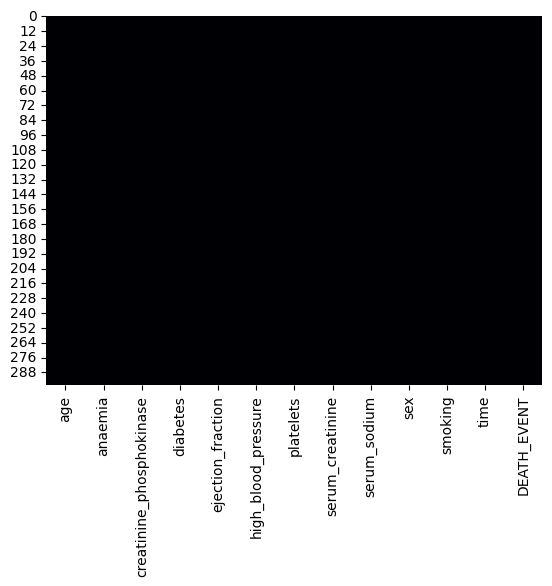

In [8]:
sns.heatmap(data_df.isnull(),cmap = 'magma',cbar = False);


<b><span style='color:#F1A424'> Note  |</span> There are 299 non-null values in all the attributes thus no missing values.</b> <br>
<b><span style='color:#F1A424'> Note  |</span> Datatype is also either 'float64' or 'int64' which works well while feeded to an algorithm..</b> 


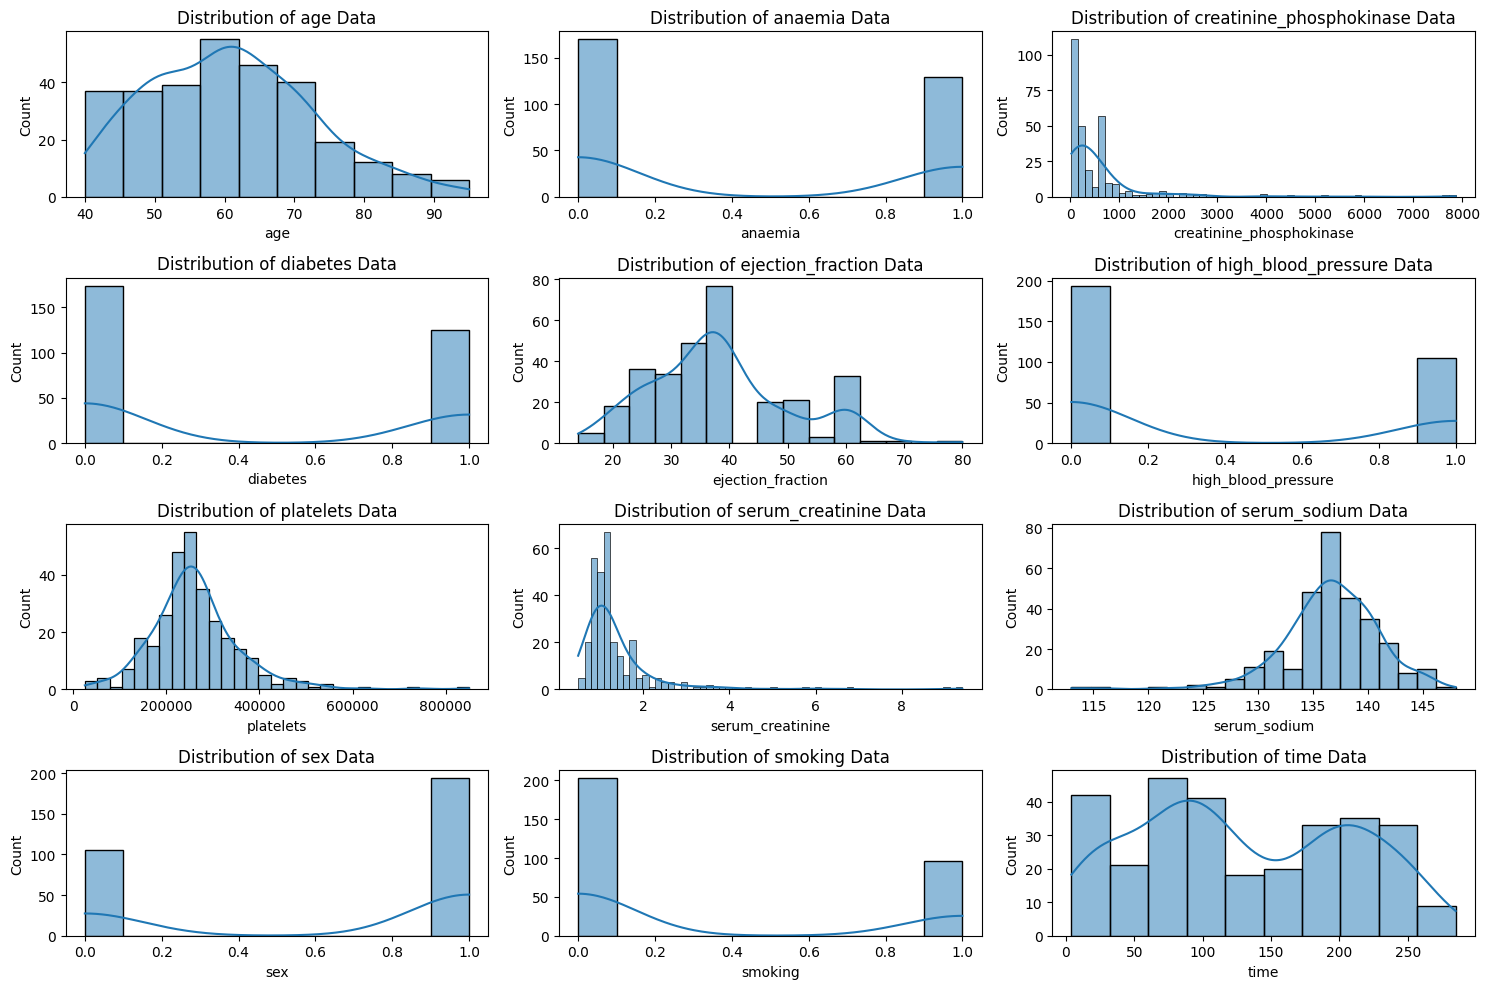

In [9]:
#### show the distrubution of al columns 
plt.figure(figsize=(15,10))
for i,col in enumerate(data_df.columns[:-1],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

[Text(0, 0, '203'), Text(0, 0, '96')]

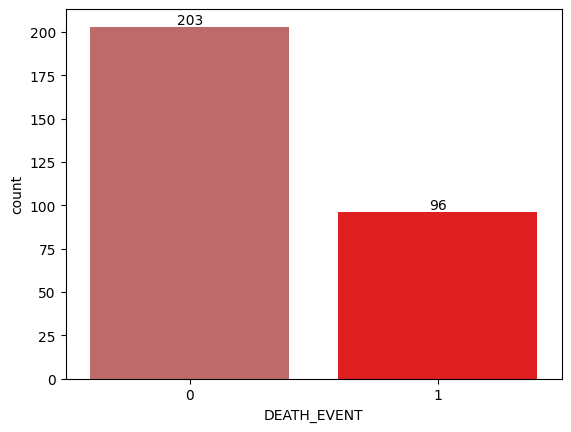

In [10]:
#Evaluating the target and finding out the potential skewness in the data
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_df["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])

<b><span style='color:#F1A424'> Note  |</span> Target labels are 203 versus 96 thus there is an imbalance in the data. values.</b> 

In [11]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

### <b><span style='color:#F1A424'> Note1  |</span>  Features "creatinine_phosphokinase" & "serum creatinine" are significantly skewed. </b> 
### <b><span style='color:#F1A424'> Note2  |</span>  All the other features almost shows the normal distribution, since mean is equal to their respective medians.  </b> 

<Axes: >

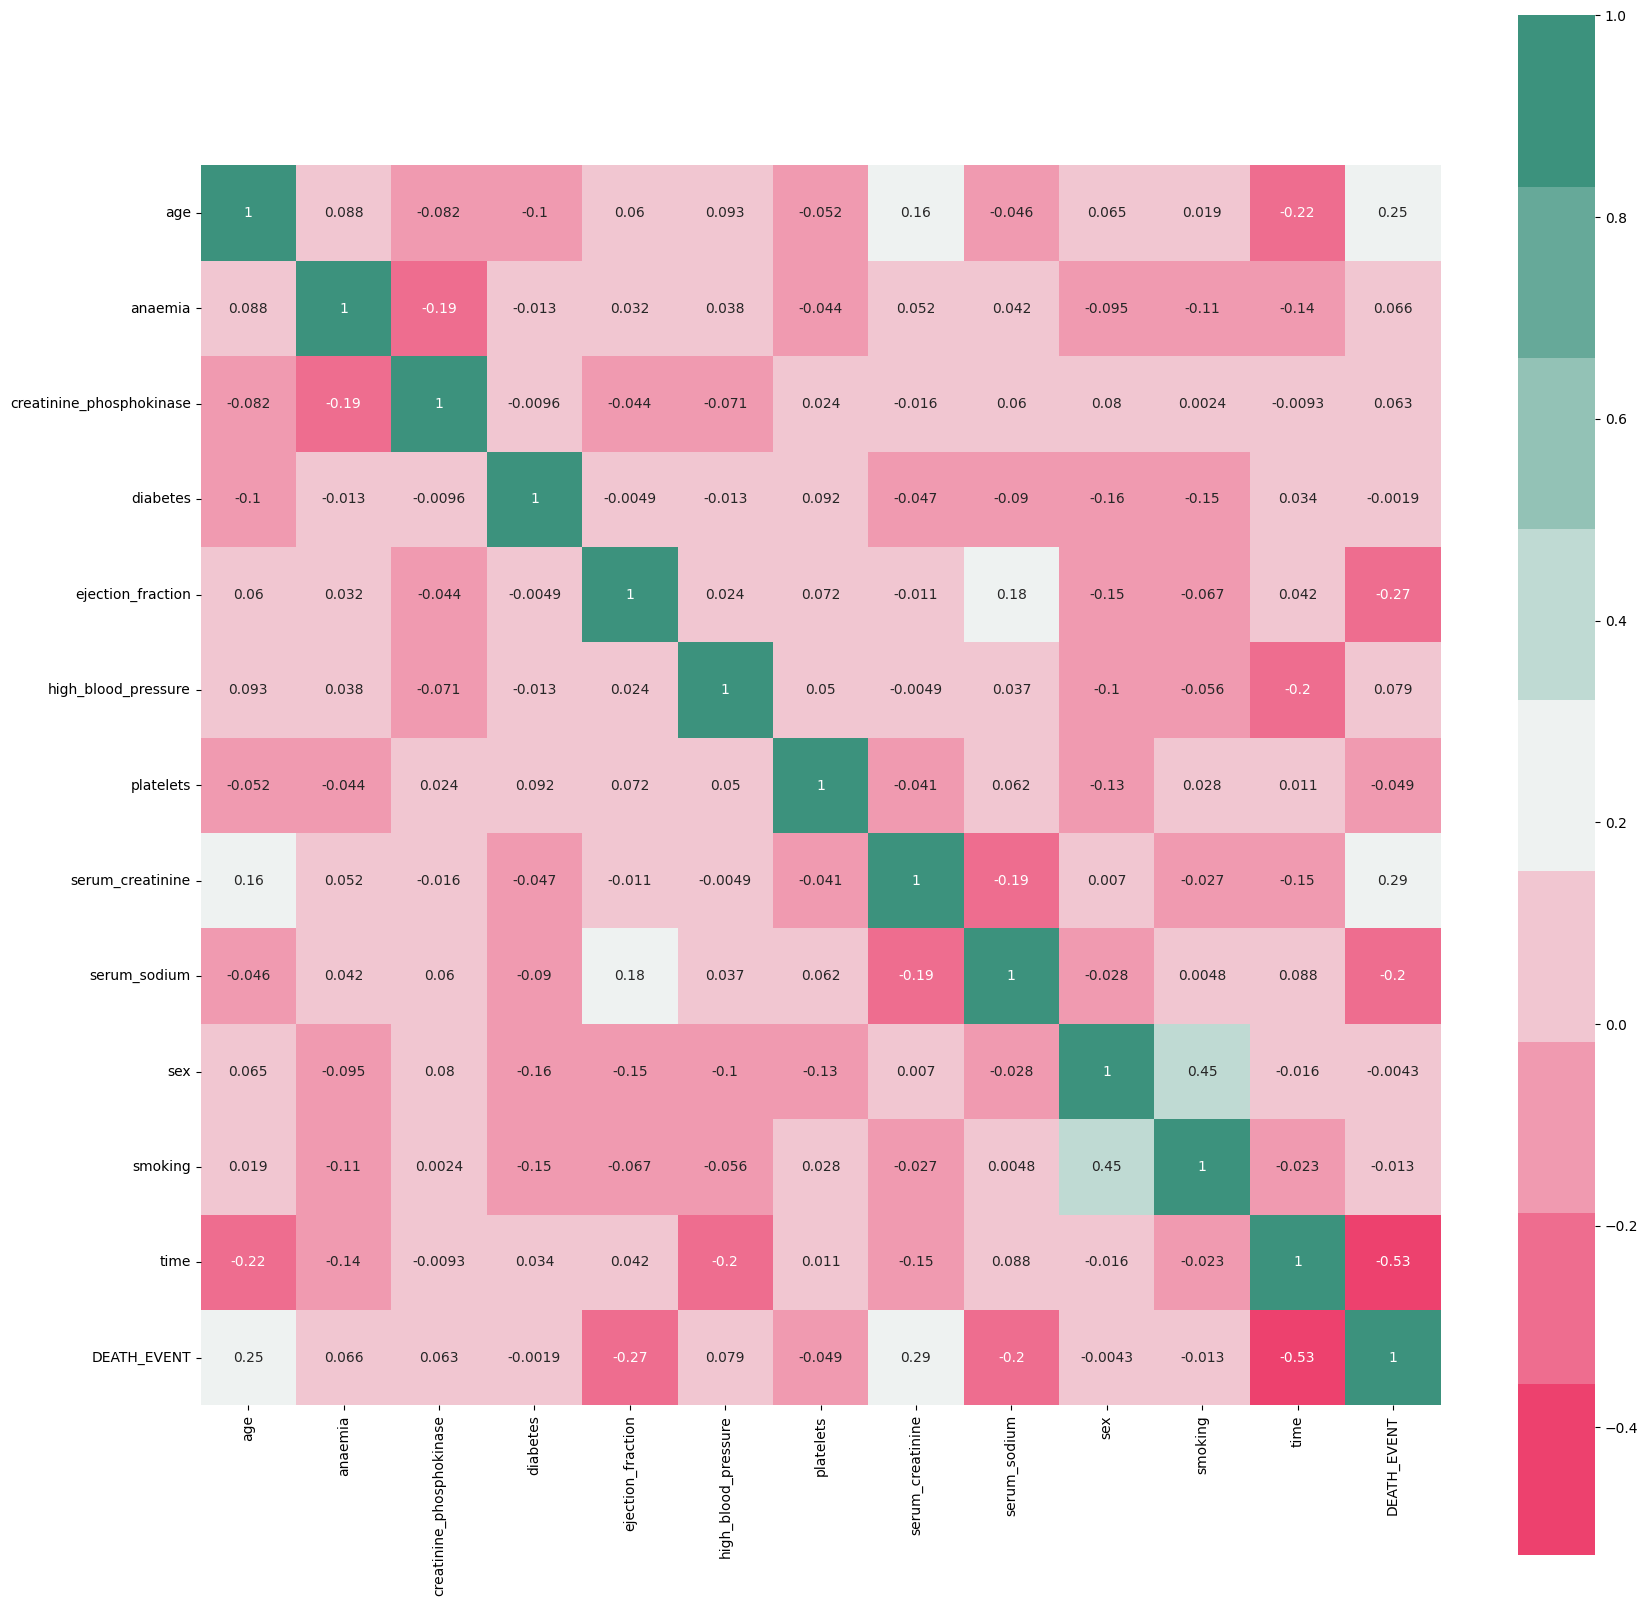

In [12]:
#Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

<b><span style='color:#F1A424'> Note  |</span> "time" is the most important feature as it would've been very crucial to get diagnosed early with cardivascular issue so as to get timely treatment thus, reducing the chances of any fatality. (Evident from the inverse relationship)   </b> <br>
<b><span style='color:#F1A424'> Note  |</span> "serum_creatinine" is the next important feature as serum's (essential component of blood) abundancy in blood makes it easier for heart to function.</b> <br>
<b><span style='color:#F1A424'> Note  |</span> "ejection_fraction" has also significant influence on target variable which is expected since it is basically the efficiency of the heart. 
  </b> <br>
<b><span style='color:#F1A424'> Note  |</span>  Can be seen from the inverse relation pattern that heart's functioning declines with ageing. </b> 

Text(0.5, 1.0, 'Distribution Of Age')

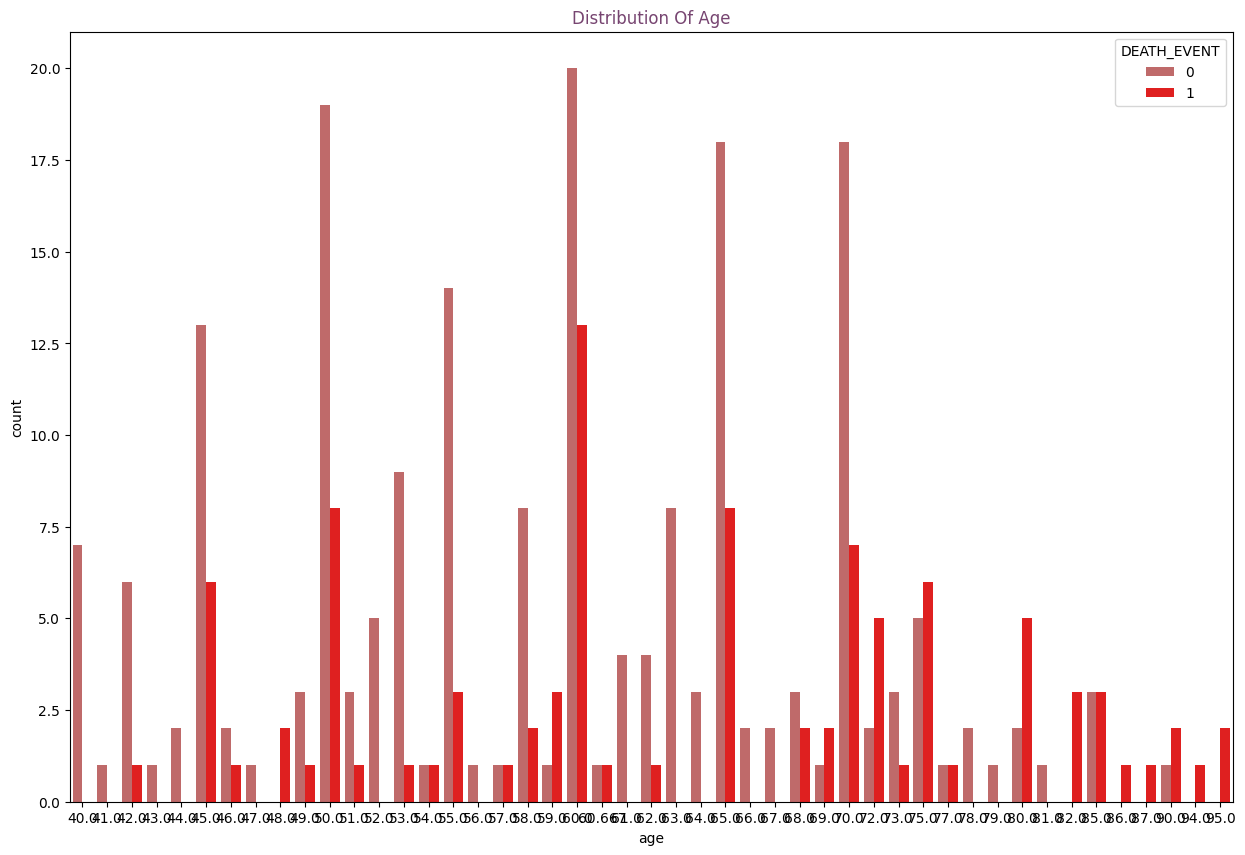

In [13]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=data_df['age'],data=data_df, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

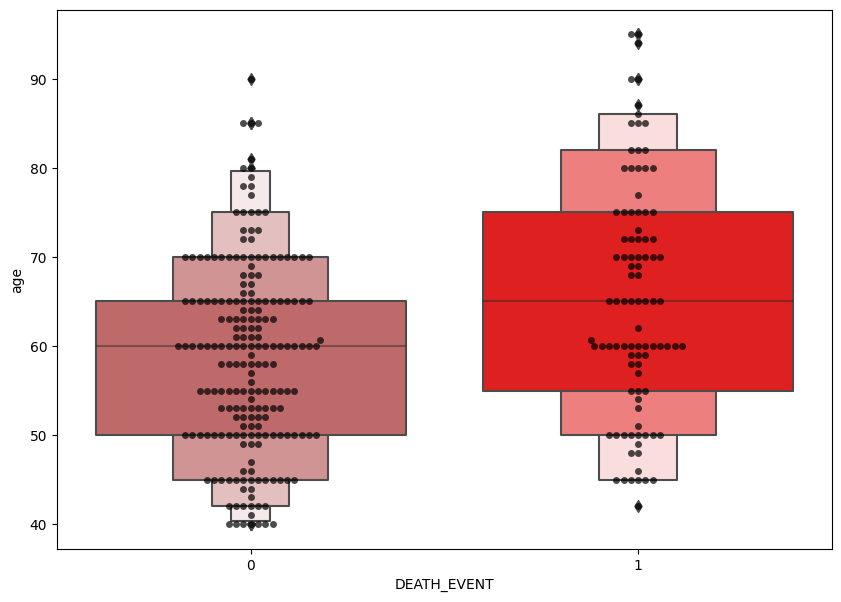

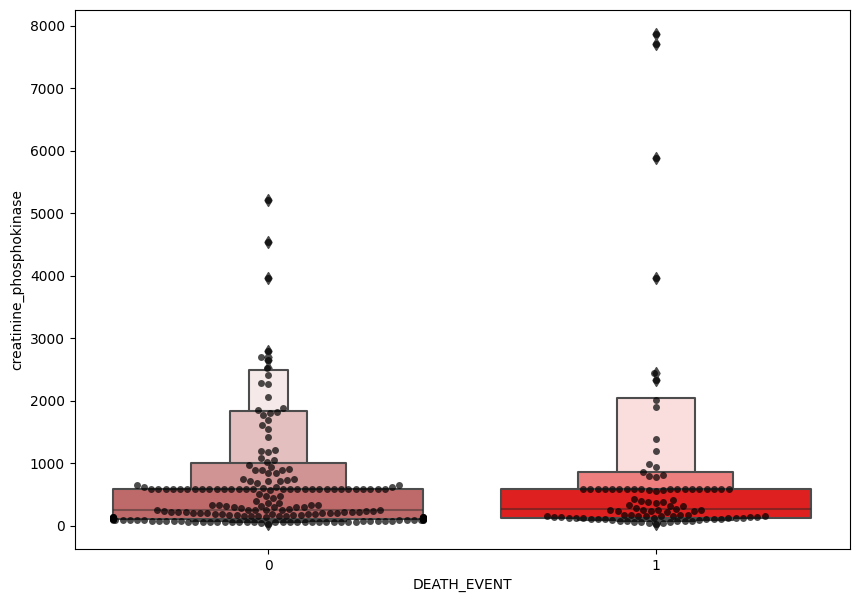

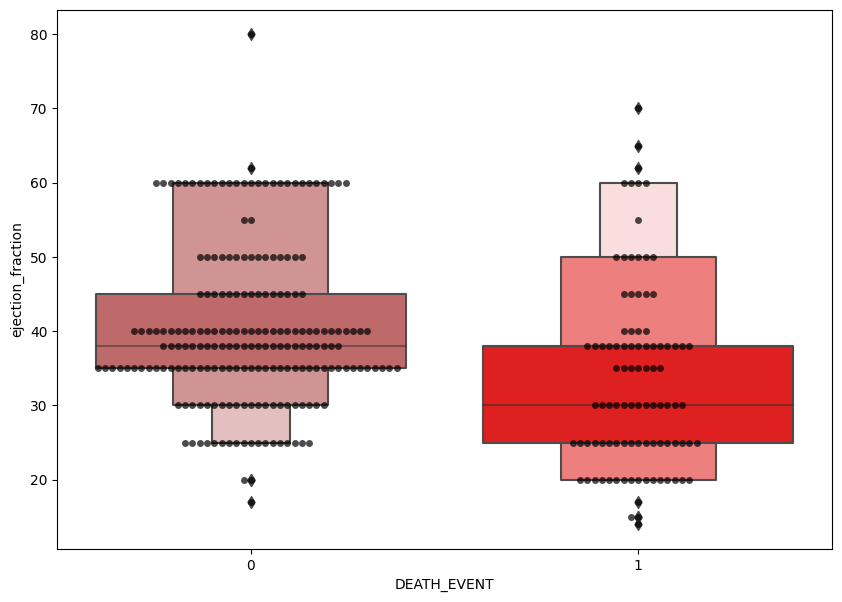

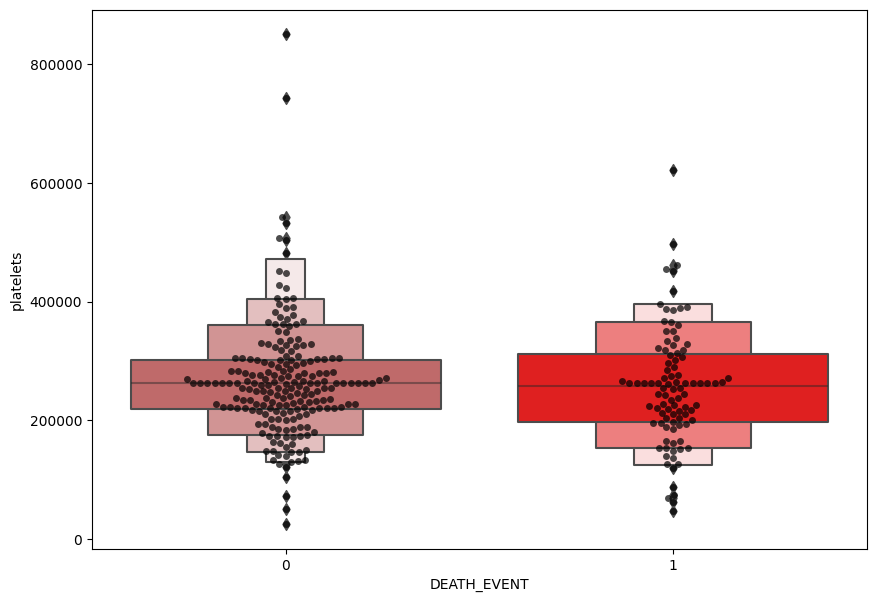

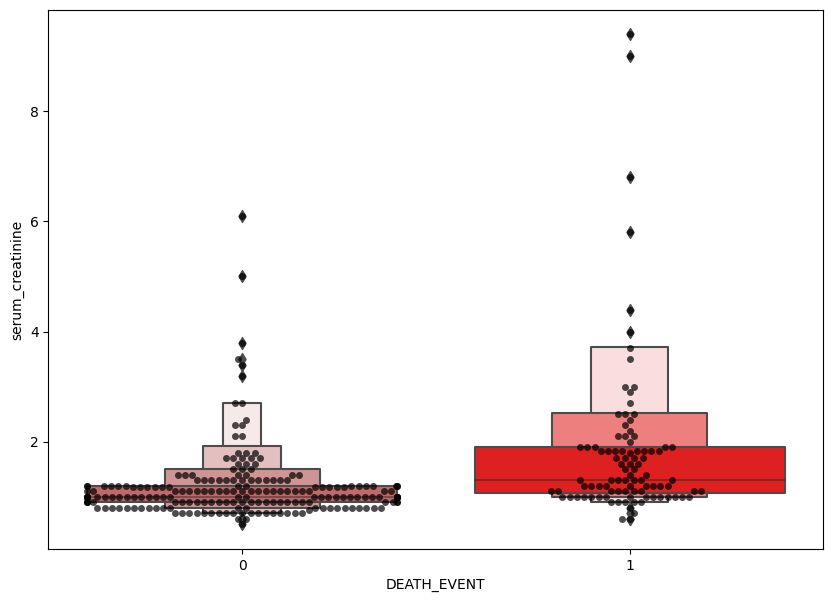

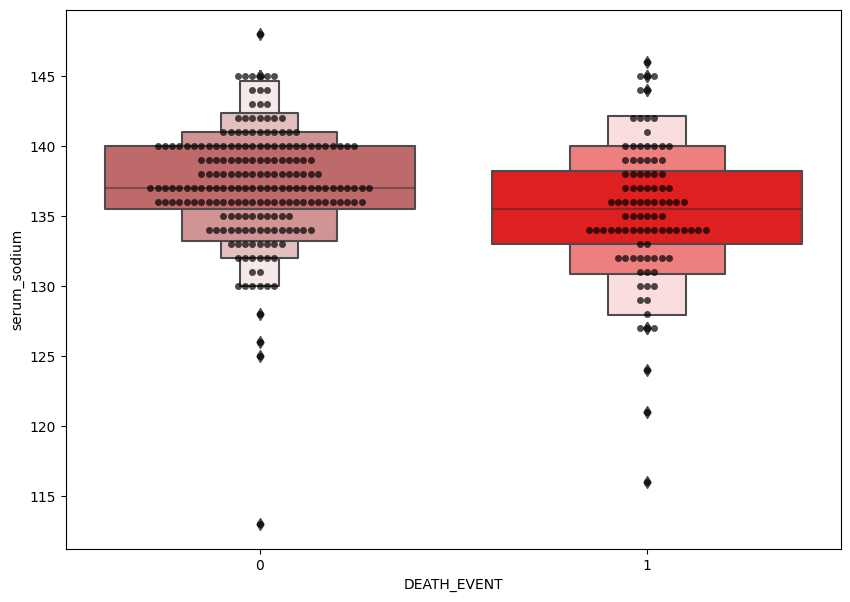

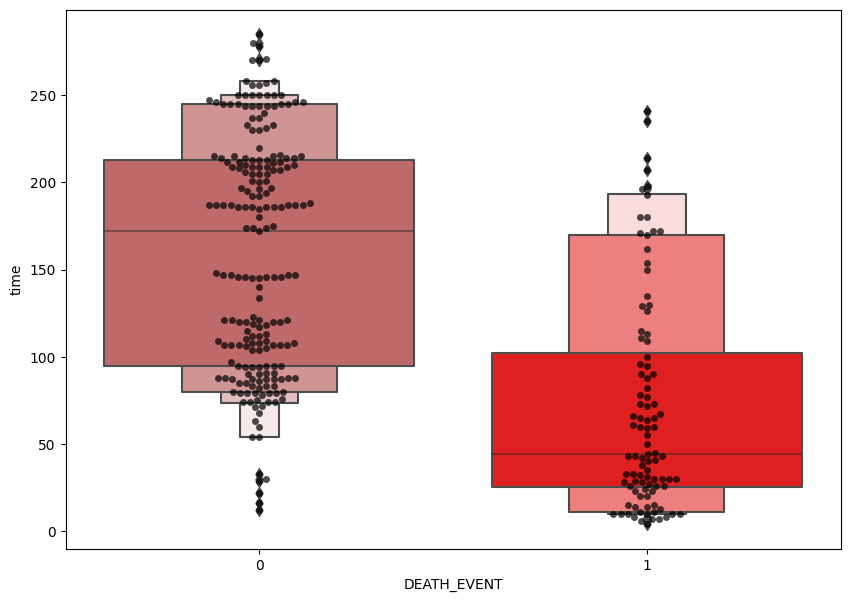

In [14]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color="black", alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
    plt.show() 

<b><span style='color:#F1A424'> Note  |</span> Few Outliers can be seen in almost all the features    </b> <br>
<b><span style='color:#F1A424'> Note  |</span> Considering the size of the dataset and relevancy of it, we won't be dropping such outliers in data preprocessing which wouldn't bring any statistical fluke. </b> <br>

<Axes: xlabel='time', ylabel='age'>

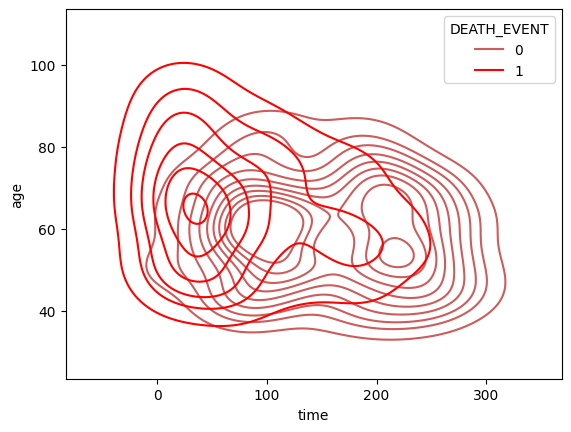

In [15]:
# Plotting "Kernel Density Estimation (kde plot)" of time and age features -  both of which are significant ones. 
sns.kdeplot(x=data_df["time"], y=data_df["age"], hue =data_df["DEATH_EVENT"], palette=cols)

<b><span style='color:#F1A424'> Note  |</span>  With less follow-up days, patients often died only when they aged more.     </b> <br>
<b><span style='color:#F1A424'> Note  |</span> More the follow-up days  more the probability is, of any fatality. </b> <br>

<a id="title-four"></a>
# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b>DATA PREPROCESSING</b></div>

In [16]:
X=data_df.iloc[:,:-1]
y=data_df.iloc[:,-1]

In [17]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

count          mean       std       min       25%  \
age                       299.0  5.703353e-16  1.001676 -1.754448 -0.828124   
anaemia                   299.0  1.009969e-16  1.001676 -0.871105 -0.871105   
creatinine_phosphokinase  299.0  0.000000e+00  1.001676 -0.576918 -0.480393   
diabetes                  299.0  9.060014e-17  1.001676 -0.847579 -0.847579   
ejection_fraction         299.0 -3.267546e-17  1.001676 -2.038387 -0.684180   
high_blood_pressure       299.0  0.000000e+00  1.001676 -0.735688 -0.735688   
platelets                 299.0  7.723291e-17  1.001676 -2.440155 -0.520870   
serum_creatinine          299.0  1.425838e-16  1.001676 -0.865509 -0.478205   
serum_sodium              299.0 -8.673849e-16  1.001676 -5.363206 -0.595996   
sex                       299.0 -8.911489e-18  1.001676 -1.359272 -1.359272   
smoking                   299.0 -1.188199e-17  1.001676 -0.687682 -0.687682   
time                      299.0 -1.901118e-16  1.001676 -1.629502 -0.739000   

                               50%       75%       max  
age                      -0.070223  0.771889  2.877170  
anaemia                  -0.871105  1.147968  1.147968  
creatinine_phosphokinase -0.342574  0.000166  7.514640  
diabetes                 -0.847579  1.179830  1.179830  
ejection_fraction        -0.007077  0.585389  3.547716  
high_blood_pressure      -0.735688  1.359272  1.359272  
platelets                -0.013908  0.411120  6.008180  
serum_creatinine         -0.284552  0.005926  7.752020  
serum_sodium              0.085034  0.766064  2.582144  
sex                       0.735688  0.735688  0.735688  
smoking                  -0.687682  1.454161  1.454161  
time                     -0.196954  0.938759  1.997038

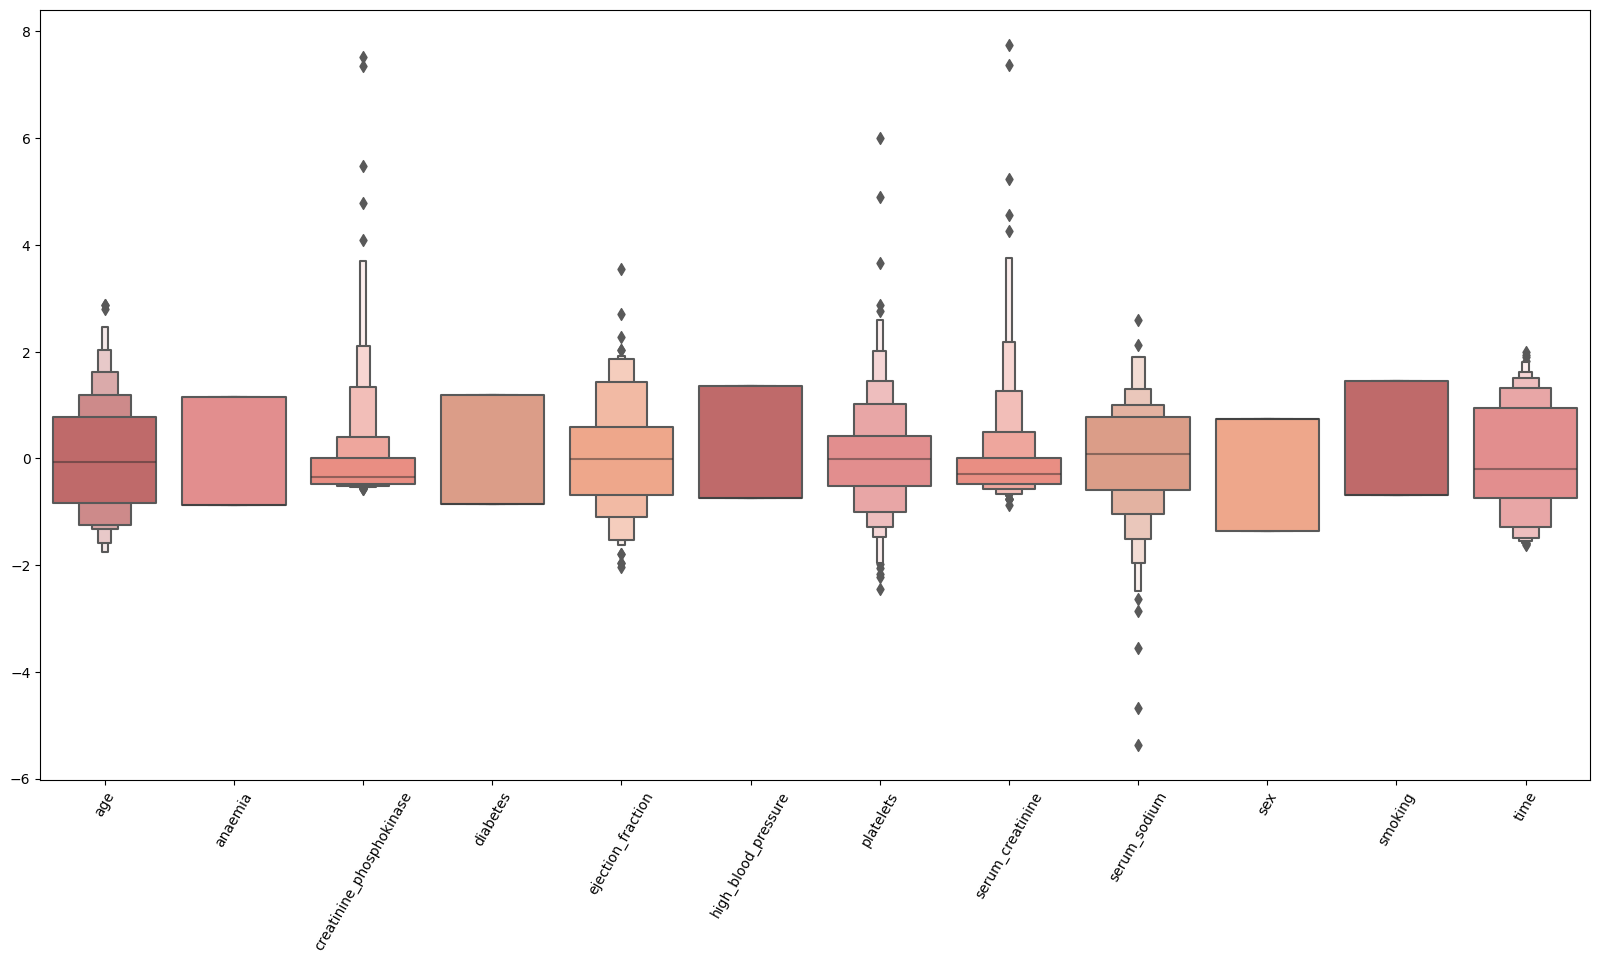

In [18]:
#Plotting the scaled features using boxen plots
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [19]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

<a id="title-MB"></a>
# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>4 |</span></b> <b>MODEL BUILDING</b></div>

<a id="title-five"></a>

## <div style="color:white;display:fill;border-radius:8px;font-size:120%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#F1A424;text-align:center'>1. SUPPORT VECTOR MACHINE (SVM) </span></b></p></div> 

In [20]:
# Instantiating the SVM algorithm 
model1=svm.SVC()

# Fitting the model 
model1.fit (X_train, y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score 
model1.score (X_test, y_test)

0.7888888888888889

In [21]:
# Printing classification report (since there was biasness in target labels)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



<Axes: >

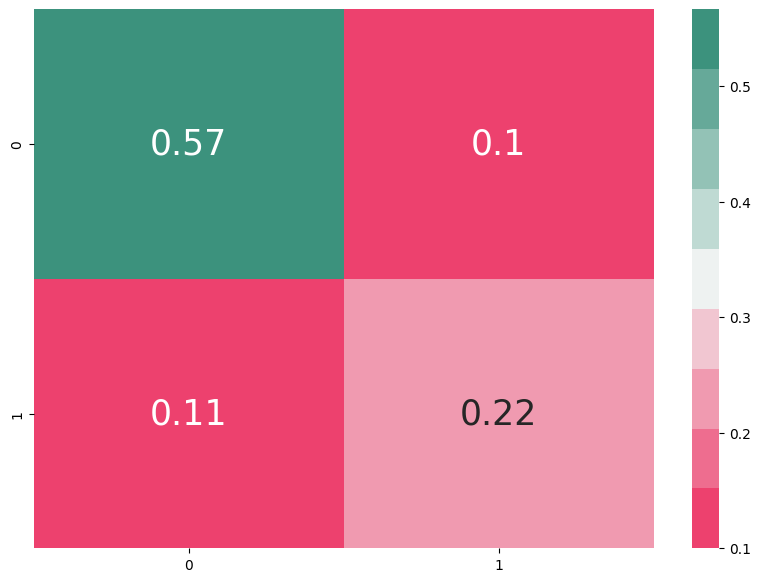

In [22]:
#Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

<a id="title-six"></a>
## <div style="color:white;display:fill;border-radius:8px;font-size:120%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#F1A424;text-align:center'>2. Artificial Neural Network (ANN) </span></b></p></div> 

In [23]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 20,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/20
7/7 [==============================] - 1s 37ms/step - loss: 0.6928 - accuracy: 0.5769 - val_loss: 0.6912 - val_accuracy: 0.8302
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.6346 - val_loss: 0.6896 - val_accuracy: 0.8302
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.6346 - val_loss: 0.6880 - val_accuracy: 0.8302
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.6346 - val_loss: 0.6864 - val_accuracy: 0.8302
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6346 - val_loss: 0.6843 - val_accuracy: 0.8302
Epoch 6/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6890 - accuracy: 0.6346 - val_loss: 0.6821 - val_accuracy: 0.8302
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.6346 - val_loss: 0.6794 - val_accuracy: 0.8302
Epoch 8/20
7/7 [=================

In [24]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 83.21%


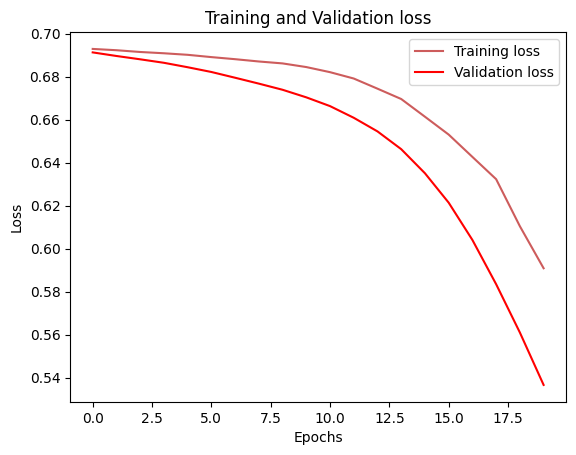

In [25]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

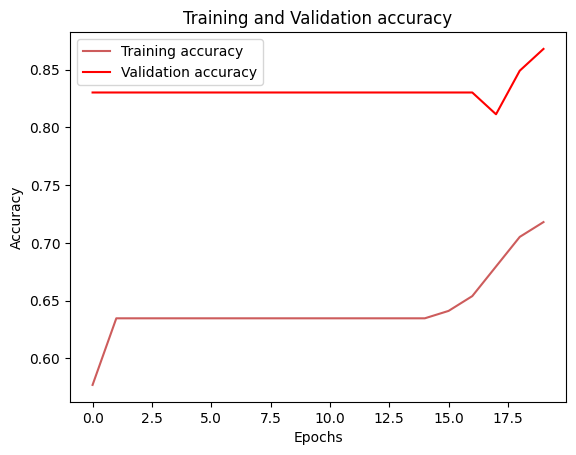

In [26]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

3/3 [==============================] - 0s 1ms/step


<Axes: >

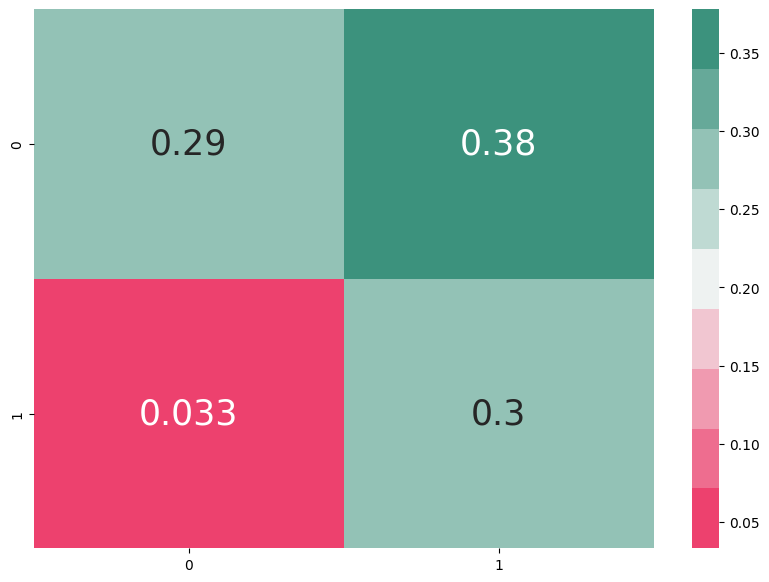

In [28]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.43      0.58        60
           1       0.44      0.90      0.59        30

    accuracy                           0.59        90
   macro avg       0.67      0.67      0.59        90
weighted avg       0.75      0.59      0.59        90



In [30]:
import pickle

pickle.dump(s_scaler,open('scaler.pkl','wb'))
pickle.dump(model1,open('SVModel.pkl','wb'))


In [31]:
pickled_model = pickle.load(open('SVModel.pkl','rb'))

In [32]:
pickled_model.predict(np.array(X_scaled.iloc[[0]]))

array([1], dtype=int64)

In [33]:
model1.predict(X_scaled.iloc[[0]])

array([1], dtype=int64)

<a id="title-seven"></a>
# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:center;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"> <b>END</b></div>